# Exploring Tidymodels <a name="title"></a>

This Notebook will explore some steps of this amazing ML tool in R

* [Importing libs](#importing_libs)
* [Loading data](#loading_data)
* [EDA](#eda)
* [Modeling Steps](#modeling)


## Importing libs

In [1]:
library(tidyverse)
library(tidymodels)
library(janitor)
library(skimr)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Adjusting plot size
library(repr)
options(repr.plot.width=20, repr.plot.height=15)

## Loading Data <a name=loading_data></a>

In [3]:
df <- read_csv('/kaggle/input/telecom-churn/telecom_churn.csv')

Rows: 3333 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustSer...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
df %>% head()

Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,128,1,1,2.7,1,265.1,110,89,9.87,10.0
0,107,1,1,3.7,1,161.6,123,82,9.78,13.7
0,137,1,0,0.0,0,243.4,114,52,6.06,12.2
0,84,0,0,0.0,2,299.4,71,57,3.10,6.6
0,75,0,0,0.0,3,166.7,113,41,7.42,10.1
0,118,0,0,0.0,0,223.4,98,57,11.03,6.3


[Page Up](#title)

## Exploratory Data Analysis <a name="eda"></a>

In [5]:
str(df)

spc_tbl_ [3,333 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Churn          : num [1:3333] 0 0 0 0 0 0 0 0 0 0 ...
 $ AccountWeeks   : num [1:3333] 128 107 137 84 75 118 121 147 117 141 ...
 $ ContractRenewal: num [1:3333] 1 1 1 0 0 0 1 0 1 0 ...
 $ DataPlan       : num [1:3333] 1 1 0 0 0 0 1 0 0 1 ...
 $ DataUsage      : num [1:3333] 2.7 3.7 0 0 0 0 2.03 0 0.19 3.02 ...
 $ CustServCalls  : num [1:3333] 1 1 0 2 3 0 3 0 1 0 ...
 $ DayMins        : num [1:3333] 265 162 243 299 167 ...
 $ DayCalls       : num [1:3333] 110 123 114 71 113 98 88 79 97 84 ...
 $ MonthlyCharge  : num [1:3333] 89 82 52 57 41 57 87.3 36 63.9 93.2 ...
 $ OverageFee     : num [1:3333] 9.87 9.78 6.06 3.1 7.42 ...
 $ RoamMins       : num [1:3333] 10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...
 - attr(*, "spec")=
  .. cols(
  ..   Churn = col_double(),
  ..   AccountWeeks = col_double(),
  ..   ContractRenewal = col_double(),
  ..   DataPlan = col_double(),
  ..   DataUsage = col_double(),
  ..   CustServCalls = 

In [6]:
# cleaning column names
df <- df %>% clean_names()

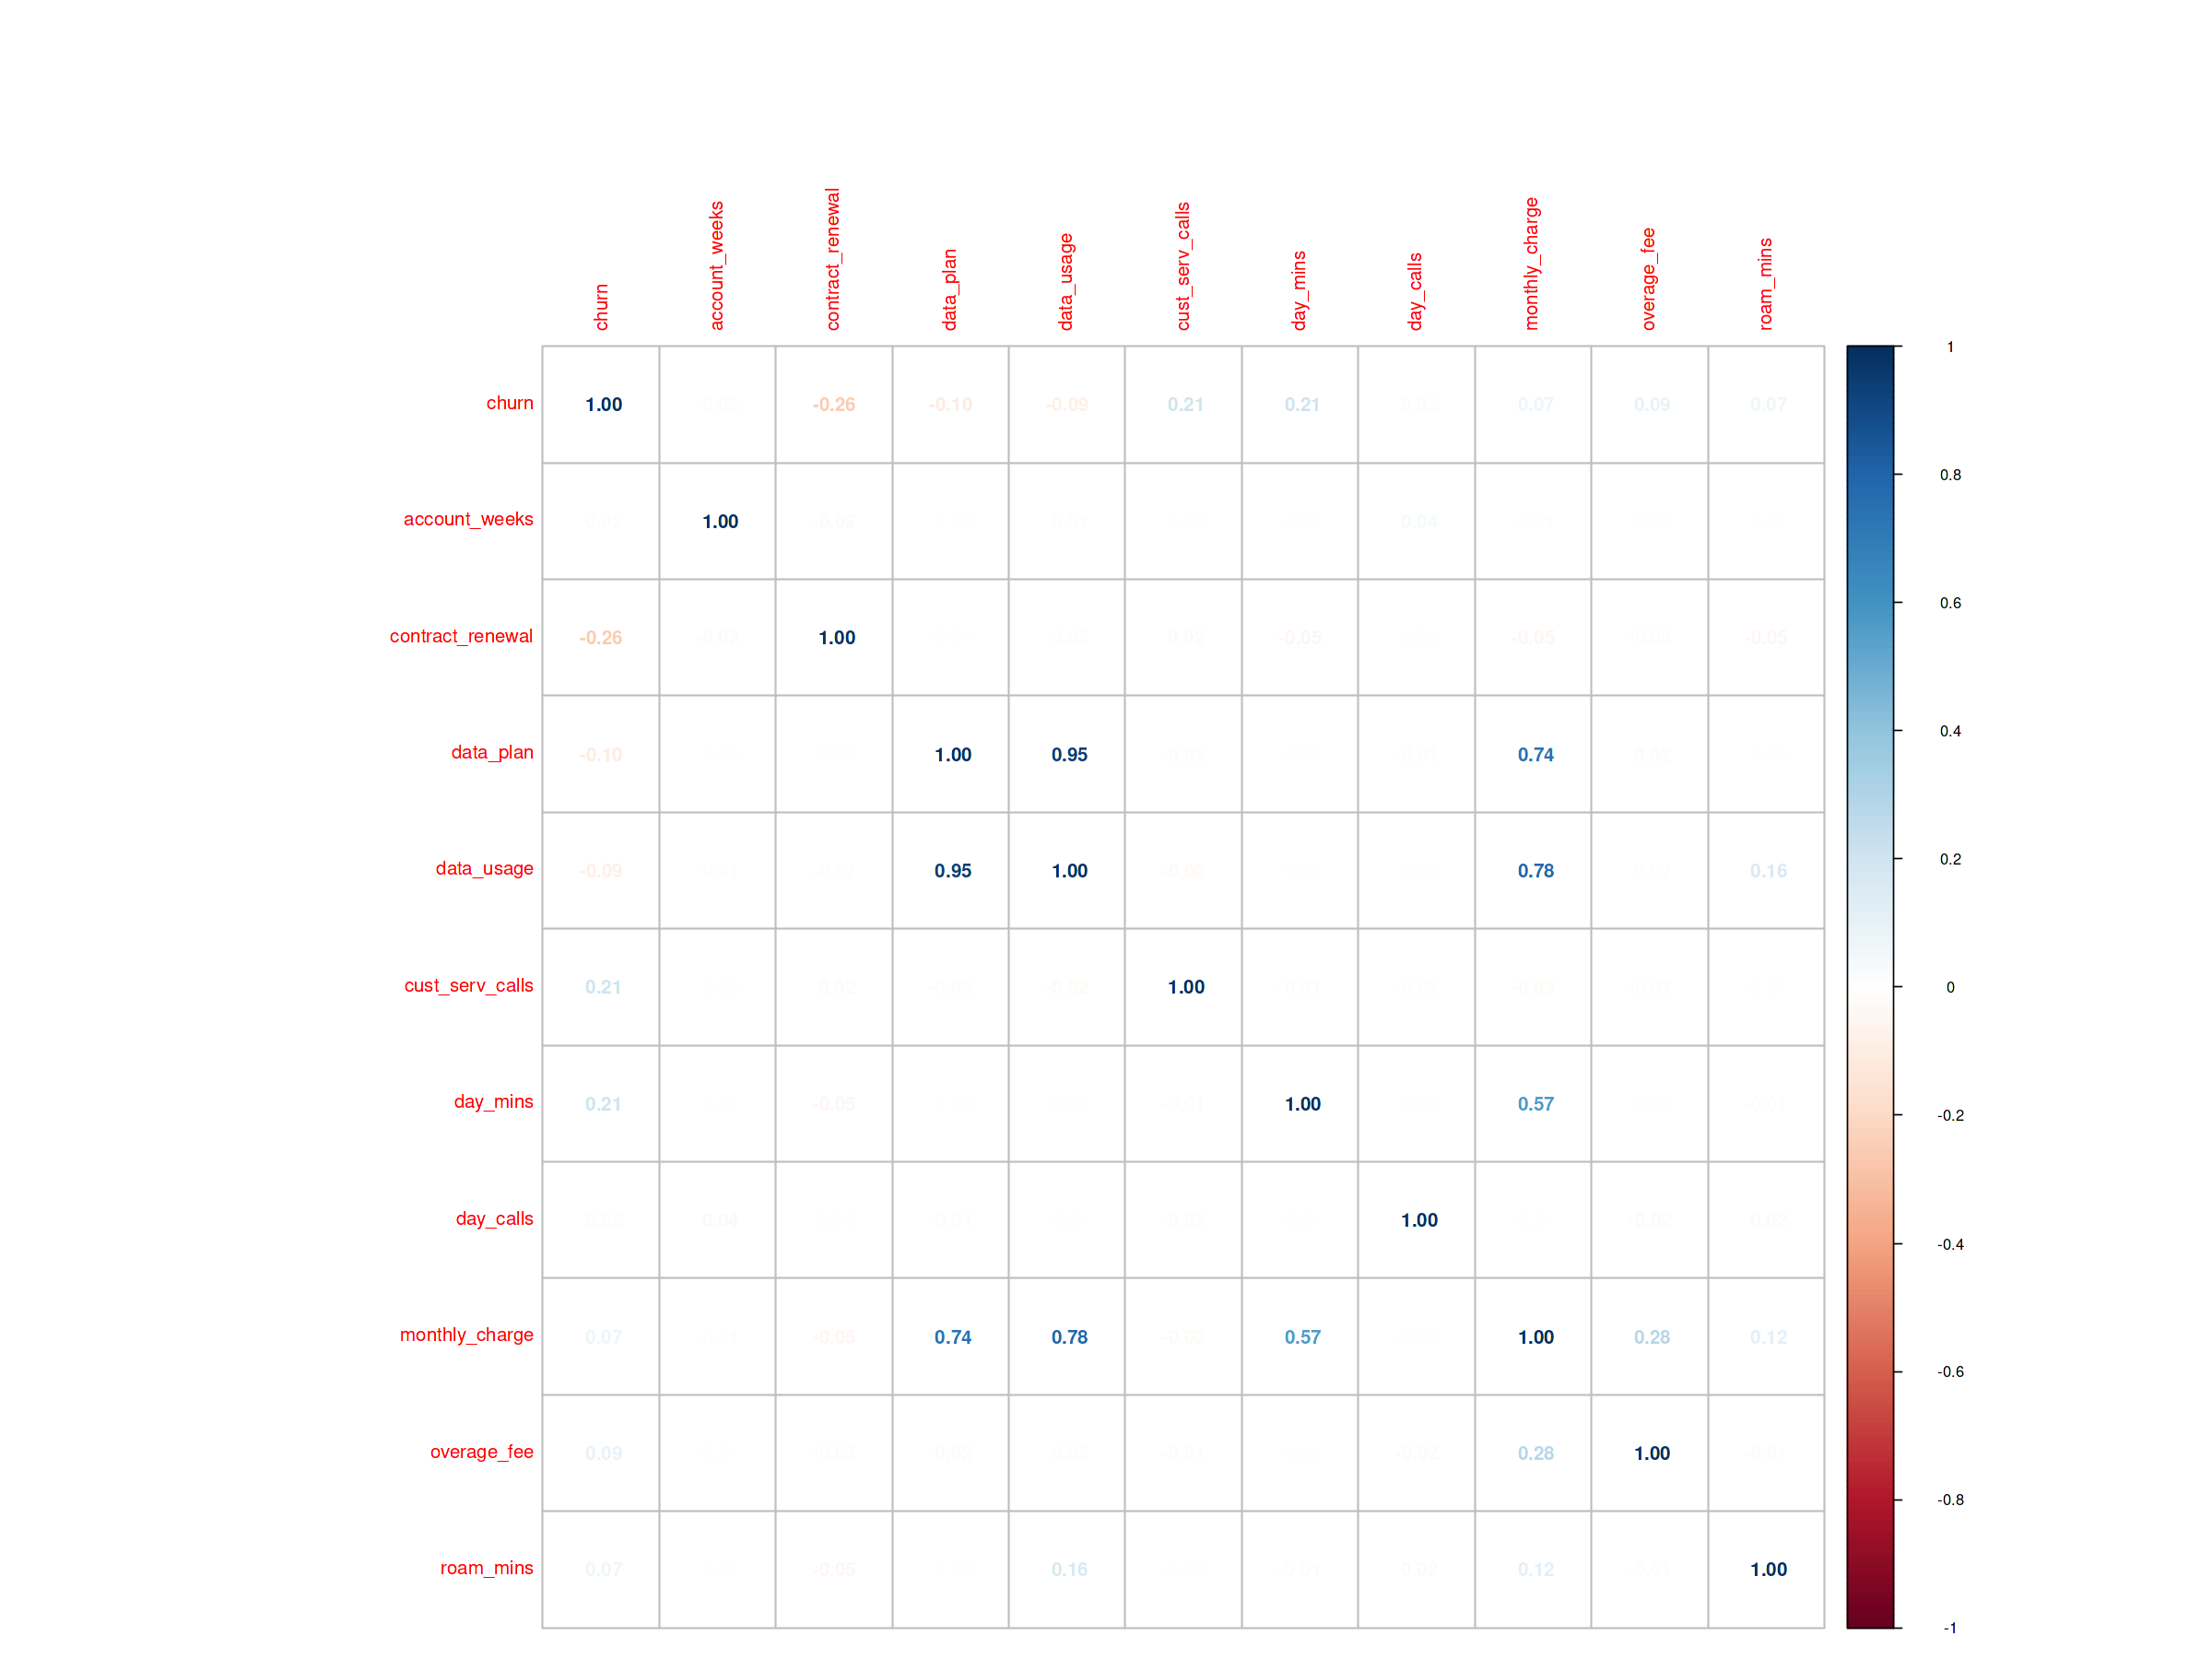

In [7]:
# let's see if we have high correlated features
df %>% cor() %>% corrplot(method = c("number"))

In [8]:
skim(df)

,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,churn,0,1,0.1449145,0.3520674,0,0.00,0.00,0.00,1.00,▇▁▁▁▂
2,numeric,account_weeks,0,1,101.0648065,39.8221059,1,74.00,101.00,127.00,243.00,▂▇▇▂▁
3,numeric,contract_renewal,0,1,0.9030903,0.2958791,0,1.00,1.00,1.00,1.00,▁▁▁▁▇
4,numeric,data_plan,0,1,0.2766277,0.4473979,0,0.00,0.00,1.00,1.00,▇▁▁▁▃
5,numeric,data_usage,0,1,0.8164746,1.2726680,0,0.00,0.00,1.78,5.40,▇▁▂▁▁
6,numeric,cust_serv_calls,0,1,1.5628563,1.3154910,0,1.00,1.00,2.00,9.00,▇▅▁▁▁
7,numeric,day_mins,0,1,179.7750975,54.4673892,0,143.70,179.40,216.40,350.80,▁▃▇▅▁
8,numeric,day_calls,0,1,100.4356436,20.0690842,0,87.00,101.00,114.00,165.00,▁▁▇▇▁
9,numeric,monthly_charge,0,1,56.3051605,16.4260317,14,45.00,53.50,66.20,111.30,▁▇▆▃▁


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             3333  
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable    n_missing complete_rate    mean     sd p0    p25   p50
 1 churn                    0             1   0.145  0.352  0   0      0  
 2 account_weeks            0             1 101.    39.8    1  74    101  
 3 contract_renewal         0             1   0.903  0.296  0   1      1  
 4 data_plan                0             1   0.277  0.447  0   0      0  
 5 data_usage               0             1   0.816  1.27   0   0      0  
 6 cust_serv_calls          0             1   1.56   1.32   0   1      1  
 7 day_mins                 0             1 18

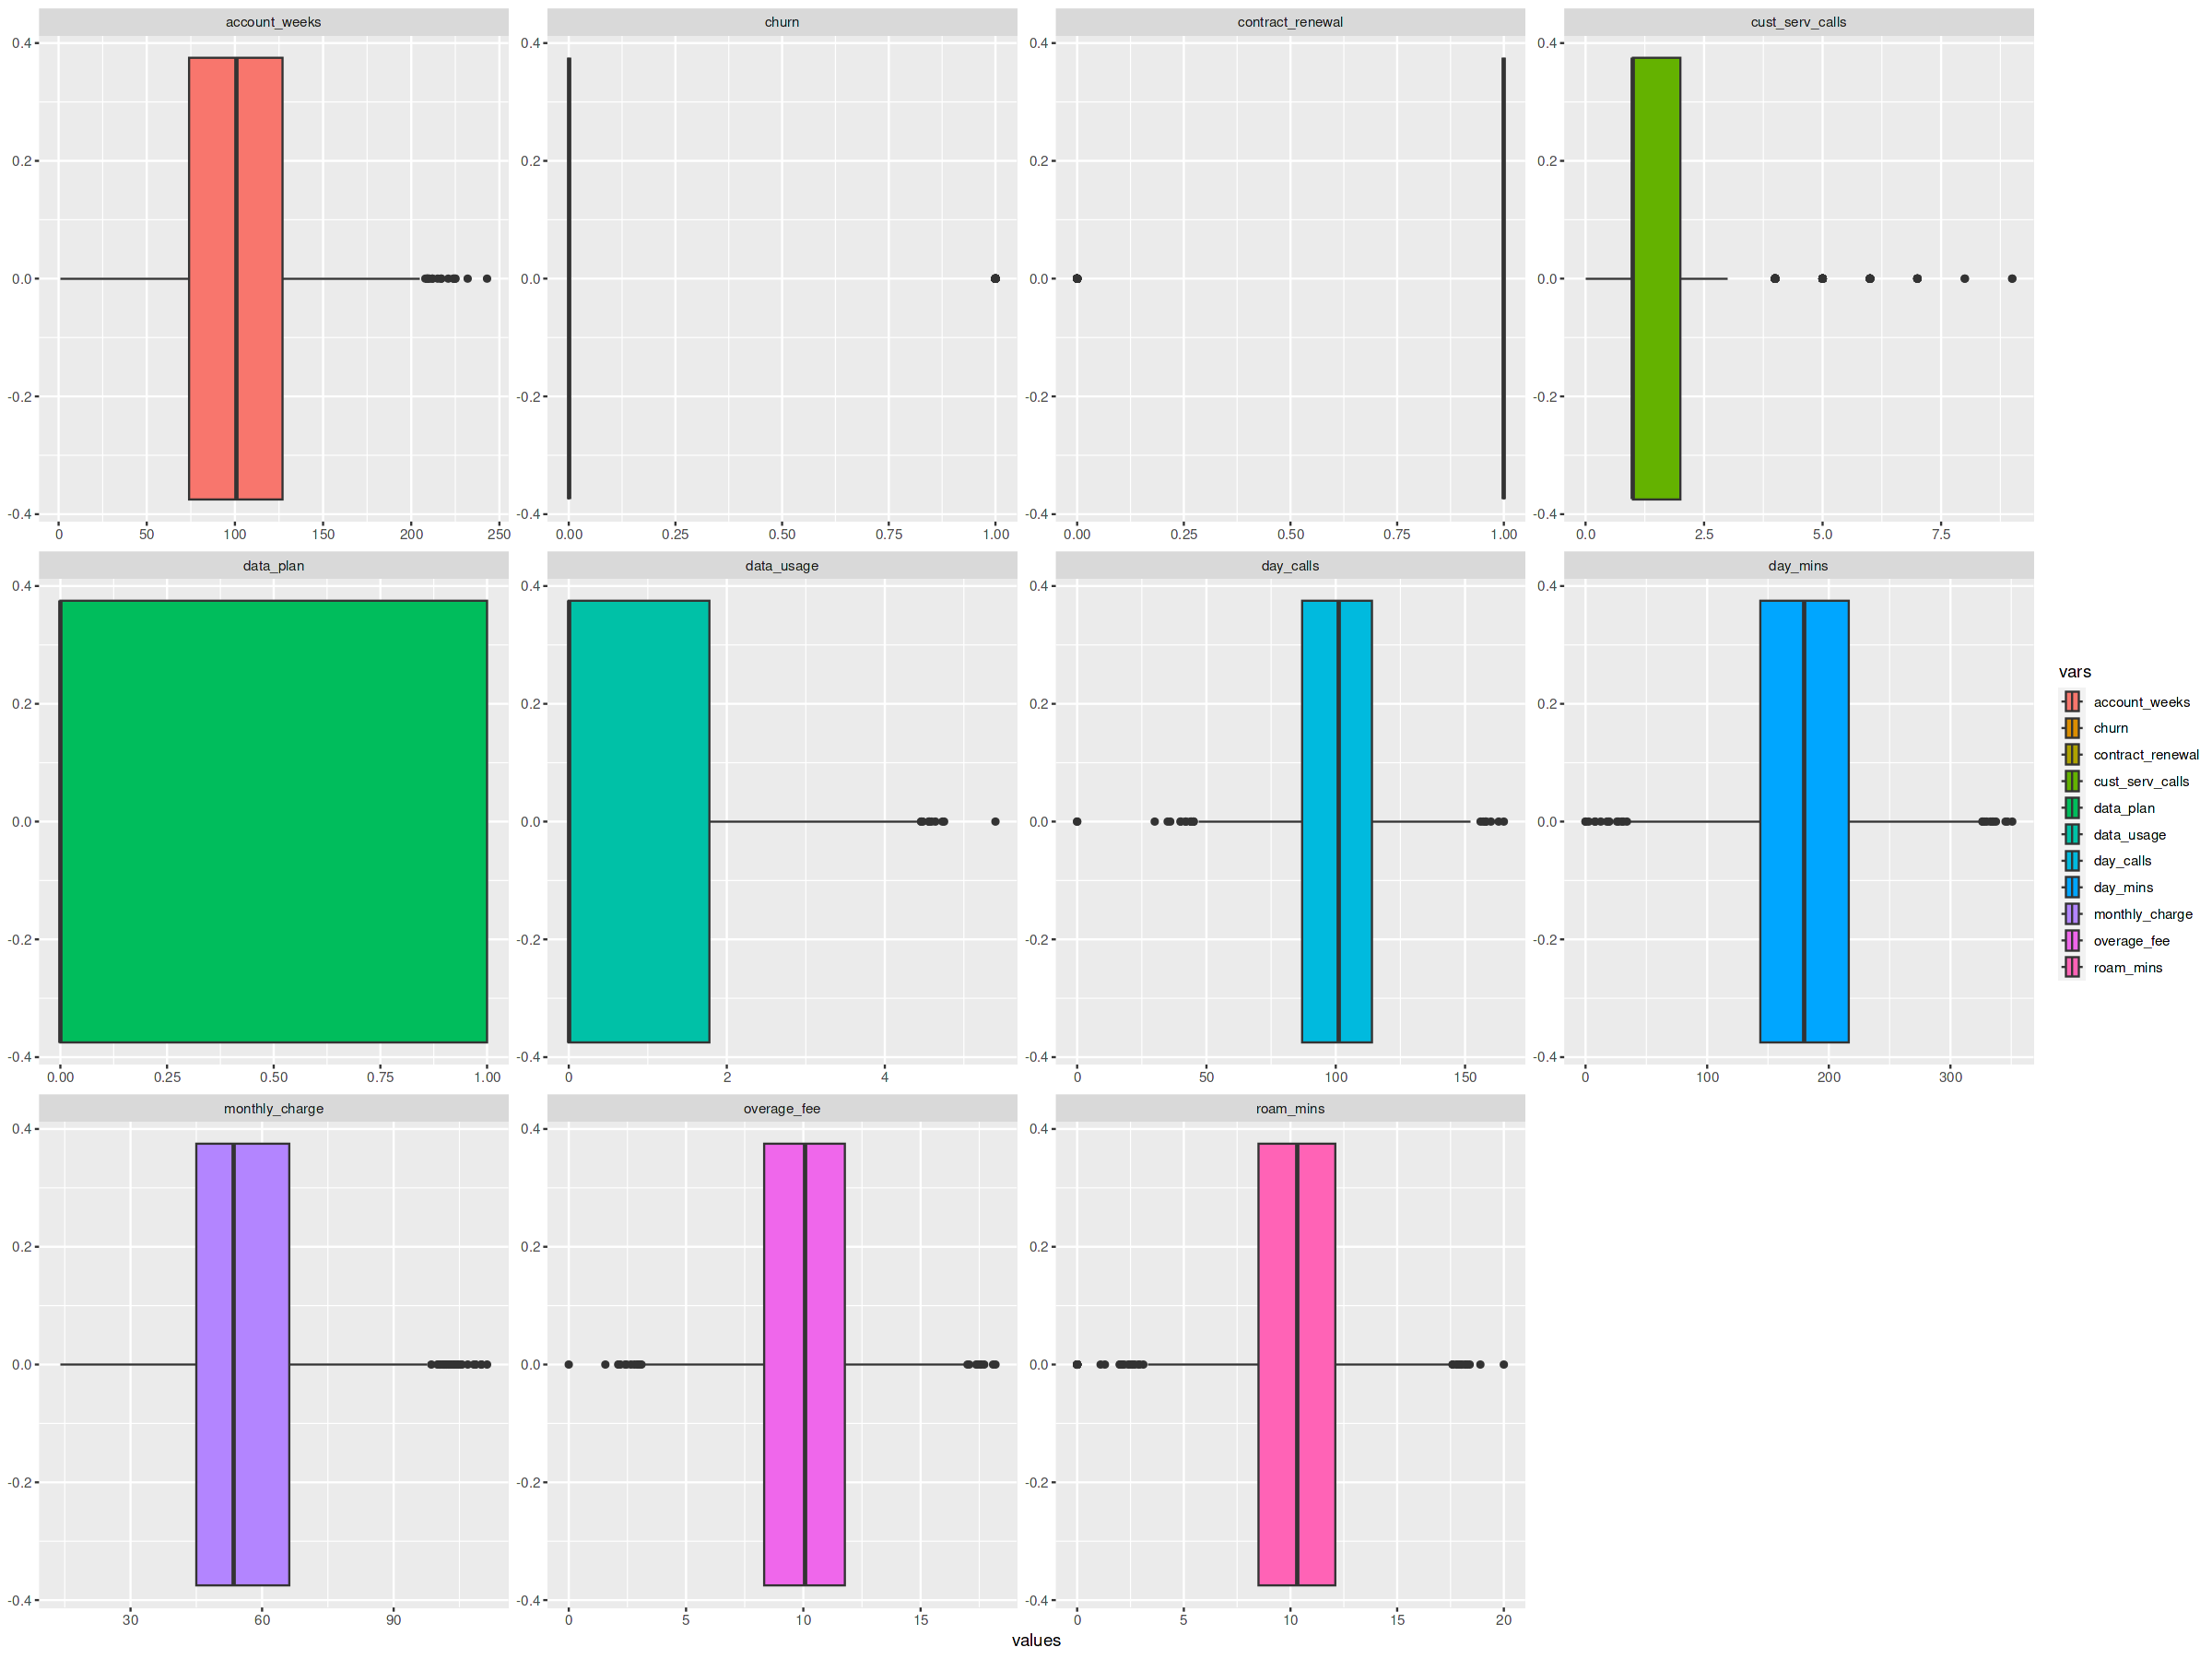

In [9]:
gather(df, "vars", "values")%>%
ggplot(aes(x = values, fill = vars))+
geom_boxplot()+
facet_wrap(vars(vars), scales = "free")

`geom_smooth()` using formula = 'y ~ x'


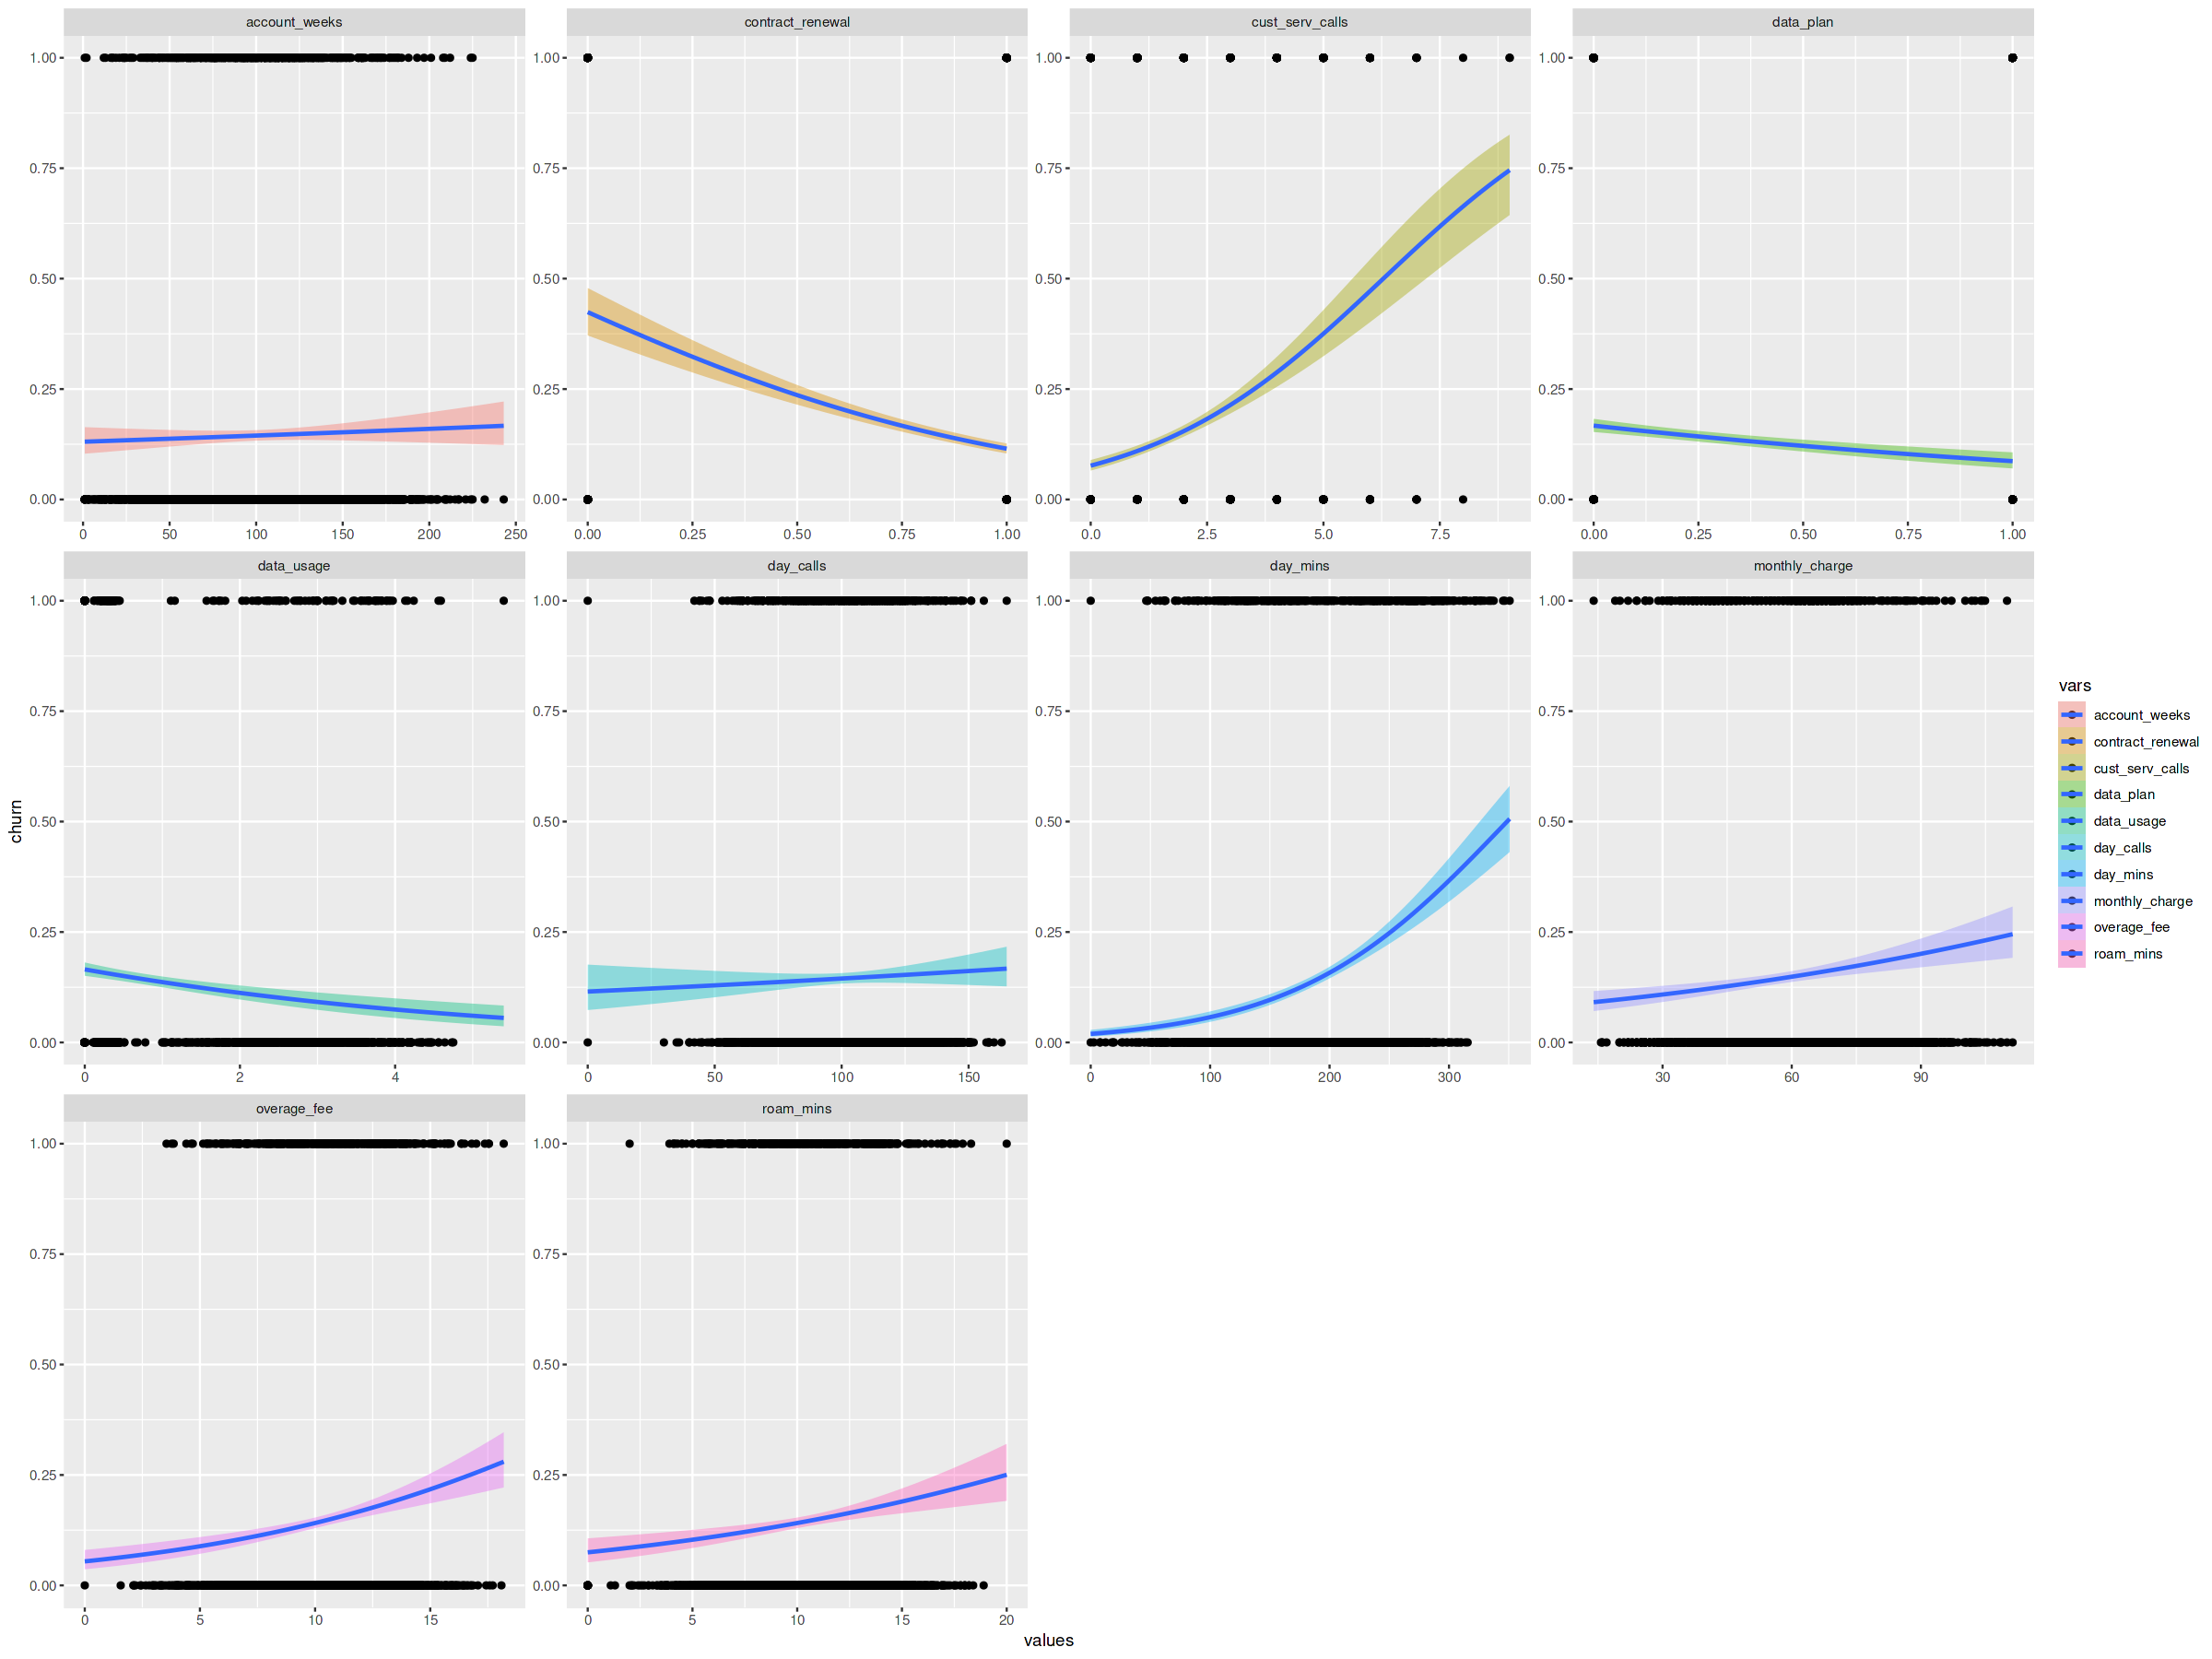

In [32]:
gather(df, "vars", "values", -churn)%>%
ggplot(aes(x = values, y = churn, fill = vars))+
geom_point()+
geom_smooth(method = "glm", method.args = list(family = "binomial"))+
facet_wrap(vars(vars), scales = "free")

[Page Up](#title)

# Modeling Steps <a name ="modeling"></a>

## Spliting Data

In [10]:
seed = 123

In [11]:
set.seed(seed)
data_split <- initial_split(df, prop = 3/4)
train <- training(data_split)
test <- testing(data_split)

## Creating a Preprocessing recipe

In [12]:
set.seed(seed)
rec <- recipe(churn ~ ., data = train) %>%
step_mutate(churn = as.factor(churn))%>% # transform churn column to factor
step_normalize(all_numeric_predictors())%>% # normalize the predictors
step_corr(all_numeric_predictors())%>% # remove high correlated variables
step_nzv(all_numeric_predictors()) # remove near zero variance predictors


In [13]:
prep(rec)%>%
bake(new_data = train) # Show data preprocessed

account_weeks,contract_renewal,data_plan,cust_serv_calls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins,churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.23920809,0.3355587,-0.6156195,0.3232782,0.02373378,-0.10963497,-0.52171680,-0.71348703,0.24356214,0
0.41465418,0.3355587,-0.6156195,0.3232782,0.16751516,0.92834691,-0.20088484,0.64087815,-0.07464617,0
0.46495128,0.3355587,-0.6156195,-0.4206189,-0.77889390,-0.01077955,-0.86676249,0.22082866,0.10213622,0
1.87327002,0.3355587,-0.6156195,0.3232782,-2.41508956,1.22491315,-1.86557896,-0.65067589,0.10213622,0
0.41465418,0.3355587,1.6237300,-0.4206189,1.99117262,-2.38330955,2.02072513,-0.67423007,-0.25142857,0
-2.37683474,0.3355587,-0.6156195,1.0671754,0.48419819,-0.65333976,0.22285548,1.57519384,0.27891862,0
-1.24515004,0.3355587,1.6237300,0.3232782,0.28399628,0.92834691,0.05941279,-1.85979031,-1.73640071,0
1.39544759,0.3355587,-0.6156195,-0.4206189,0.28945633,-1.29589997,-0.26141917,0.24438283,-0.81713224,0
0.36435709,0.3355587,-0.6156195,0.3232782,0.89552213,-0.35677351,-0.07981618,-0.32091741,-0.49892393,0


## Defining Model

In [14]:
model <- rand_forest(mtry = tune(),
                    trees = tune(),
                    min_n = tune())%>%
        set_engine("randomForest")%>% # setting wich engine we are gonna use for random forest model
        set_mode("classification") # setting mode

## Creating Workflow

In [15]:
wf <- workflow()%>%
        add_model(model)%>%
        add_recipe(rec)

## Validation Set

In [16]:
set.seed(seed)
val_set <- vfold_cv(train, v= 3, strata = churn)

## Training Model

In [17]:
set.seed(seed)
model_trained <- wf %>%
                    tune_grid(
                    val_set,
                    grid = 10,
                    control = control_grid(save_pred = T),
                    metrics = metric_set(accuracy)
                    )

i Creating pre-processing data to finalize unknown parameter: mtry



In [18]:
model_trained %>% show_best(n=10)

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,325,7,accuracy,binary,0.9311725,3,0.006731734,Preprocessor1_Model08
4,70,30,accuracy,binary,0.9303721,3,0.004851683,Preprocessor1_Model01
2,1441,16,accuracy,binary,0.9291717,3,0.004544945,Preprocessor1_Model10
5,1737,35,accuracy,binary,0.9287715,3,0.004717818,Preprocessor1_Model03
5,1904,23,accuracy,binary,0.9287715,3,0.004614871,Preprocessor1_Model09
6,1124,37,accuracy,binary,0.9283713,3,0.005108902,Preprocessor1_Model04
8,950,25,accuracy,binary,0.9263705,3,0.005602241,Preprocessor1_Model07
7,467,10,accuracy,binary,0.9251701,3,0.007665964,Preprocessor1_Model02
9,773,6,accuracy,binary,0.9231693,3,0.009089889,Preprocessor1_Model05


## Selecting best parameter

In [19]:
set.seed(seed)
model_best_tune <- select_best(model_trained, "accuracy")
final_model <- model %>%
                finalize_model(model_best_tune)

## Last Fitting

In [20]:
set.seed(seed)
final_wf <- workflow()%>%
            add_recipe(rec)%>%
            add_model(final_model)%>%
            last_fit(data_split)

In [21]:
preds <- collect_predictions(final_wf)

In [22]:
preds %>% head()

id,.pred_0,.pred_1,.row,.pred_class,churn,.config
<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>
train/test split,0.97846154,0.02153846,3,0,0,Preprocessor1_Model1
train/test split,0.85846154,0.14153846,6,0,0,Preprocessor1_Model1
train/test split,1.00000000,0.00000000,12,0,0,Preprocessor1_Model1
train/test split,0.98769231,0.01230769,14,0,0,Preprocessor1_Model1
train/test split,0.01846154,0.98153846,22,1,1,Preprocessor1_Model1
train/test split,0.93846154,0.06153846,26,0,0,Preprocessor1_Model1


## Confusion Matrix

In [23]:
table(preds$churn, preds$.pred_class)

   
      0   1
  0 709   8
  1  37  80

## Feature Importance


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




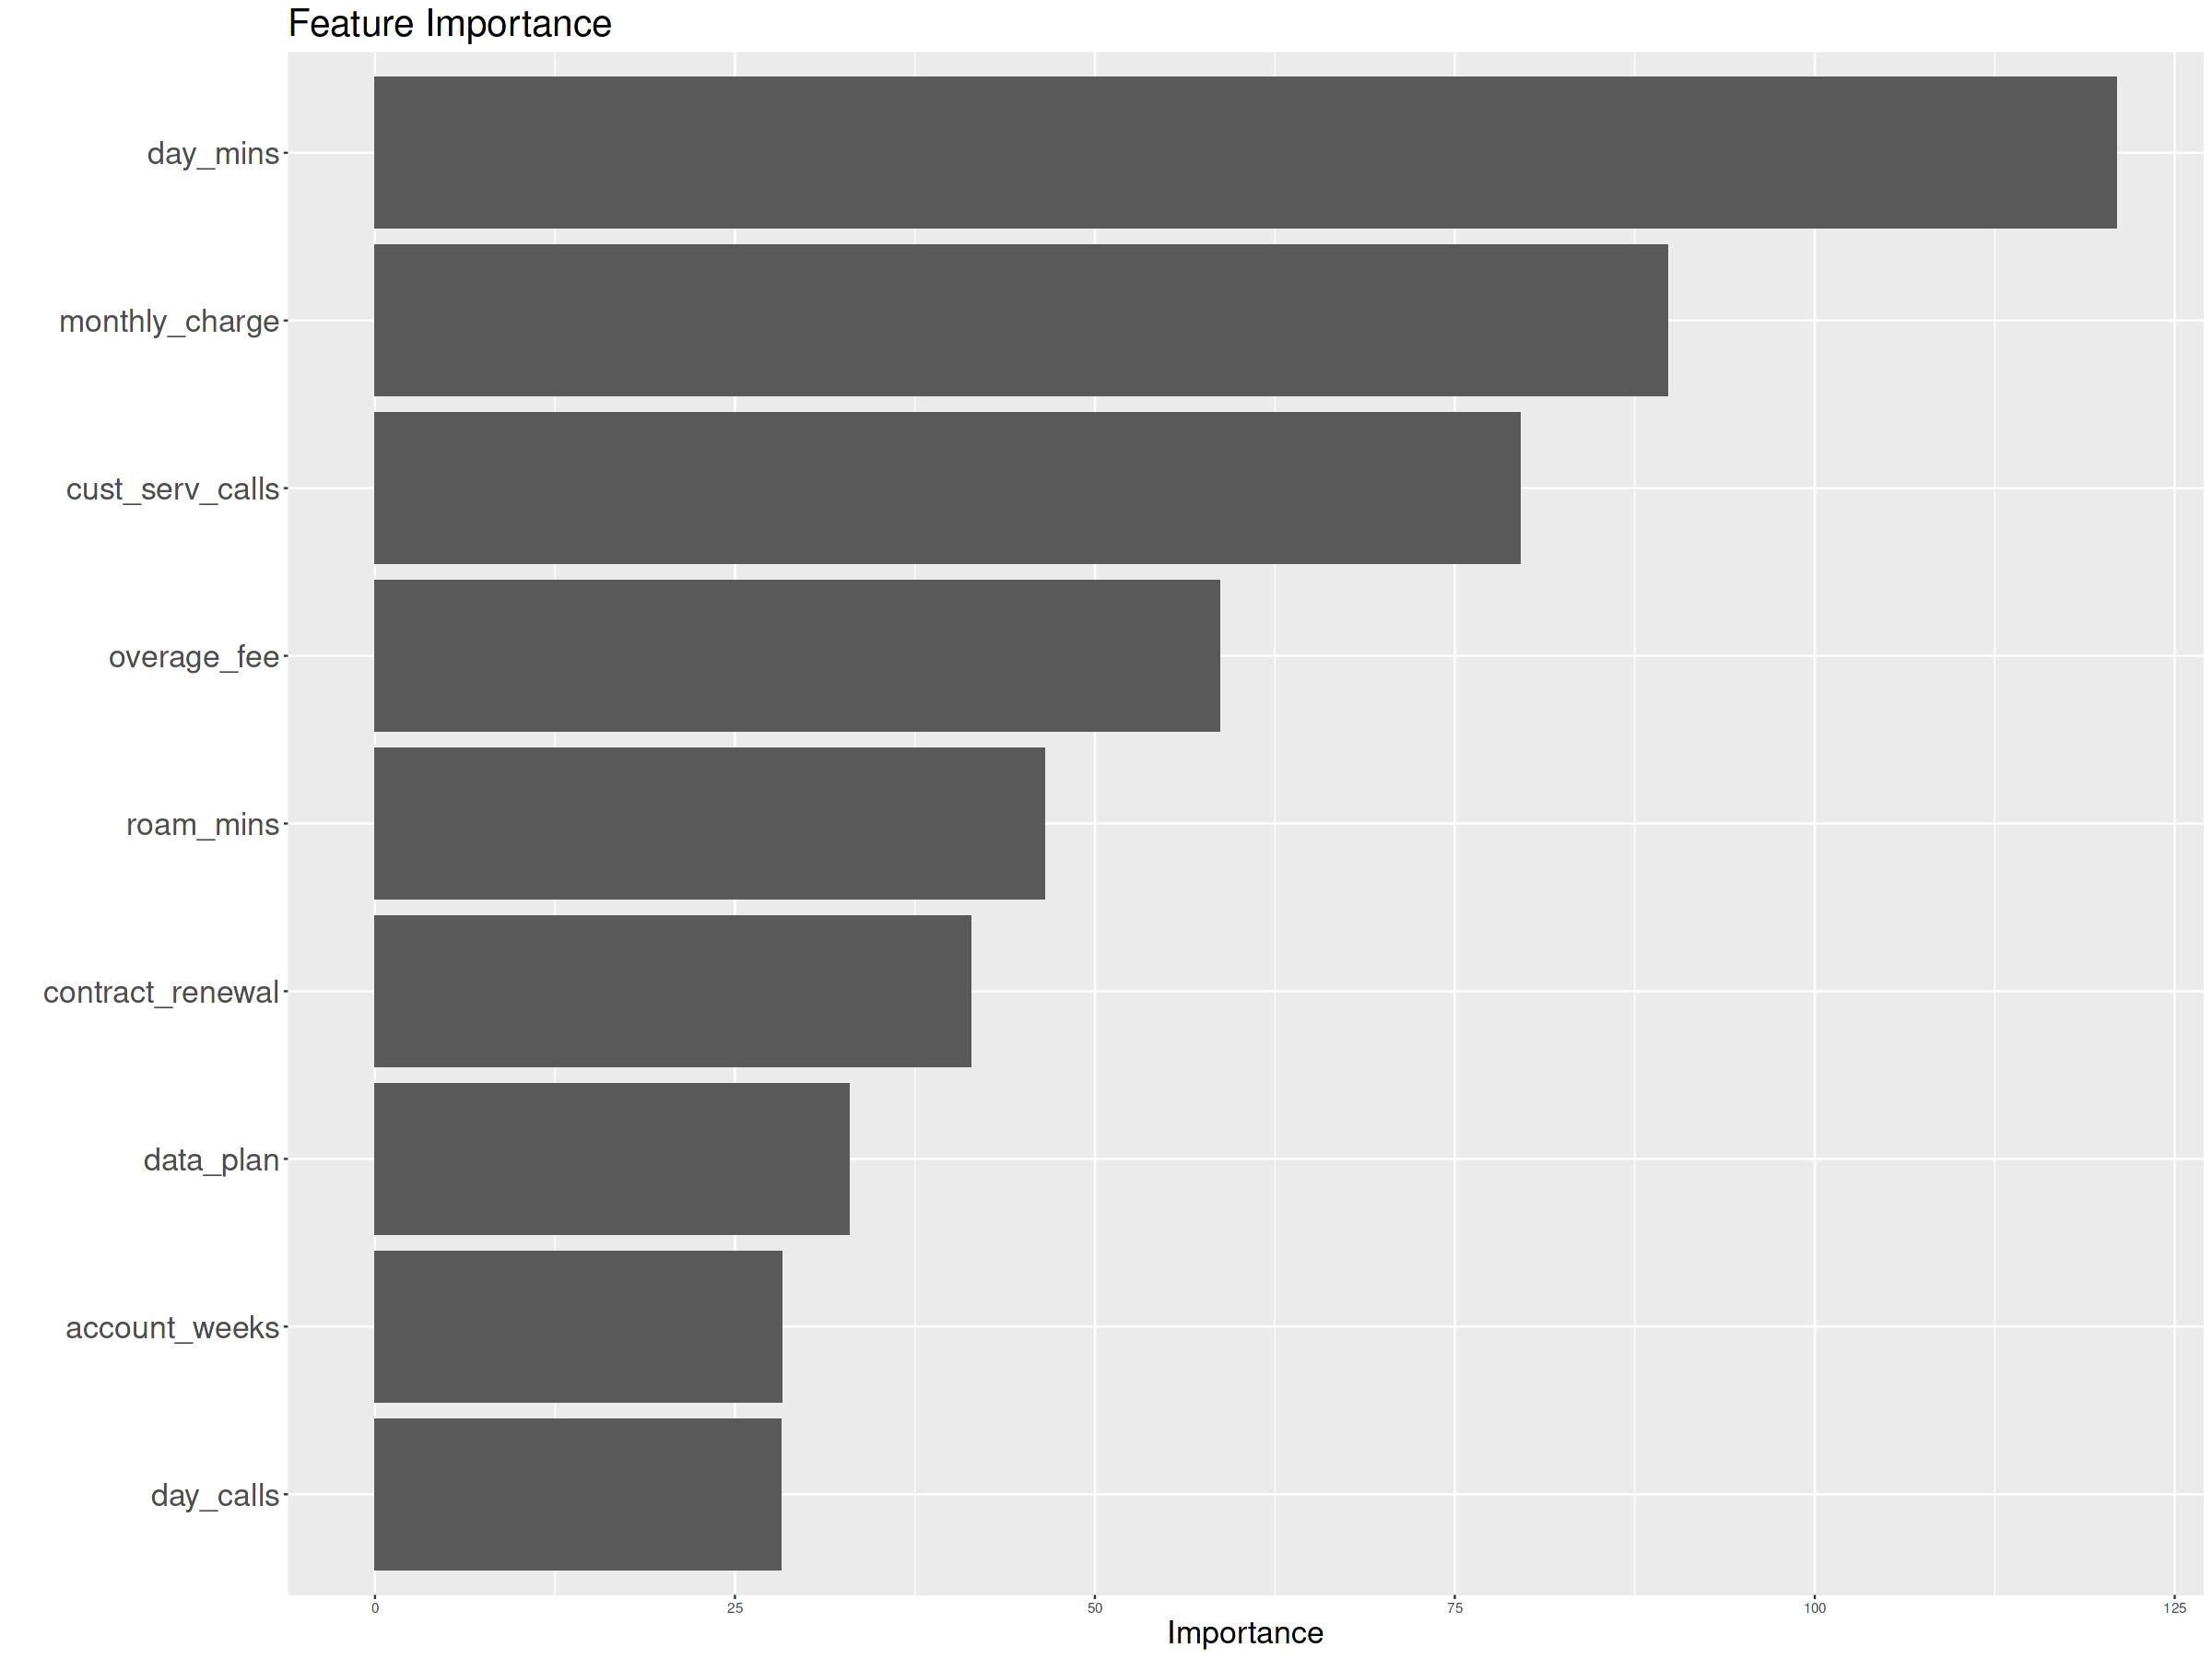

In [24]:
library(vip)

final_wf %>%
    extract_fit_parsnip()%>%
    vip()+
    ggtitle("Feature Importance")+
    theme(title = element_text(size = 20),
          axis.text.y.left =  element_text(size = 20))

We can see what affects churn is mainly the relation the customer does between day mins and their bill.

[Page Up](#title)